### Steps:
1. Load data from local directory
2. Clean data i.e, remove stop words make case small
3. Pre-process data (using Google's word embeddings or TF-IDF vectorizer based on laptop specifications)
4. Split data into test and train sets
5. Train a deep learning model on the feature vectors using the training data (X_train and y_train)
6. Predict on X_test to get y_test_predicted; compare with y_test_actual
7. Calculate metrics



importing required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import string
import tensorflow as tf
import tensorflow_hub as hub
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/kgvt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

install nltk if not available

In [2]:
# !pip3 install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 4.8 MB/s eta 0:00:00a 0:00:01


reading spam and ham folders from the folder i.e, base_path and assiging lables from folder name

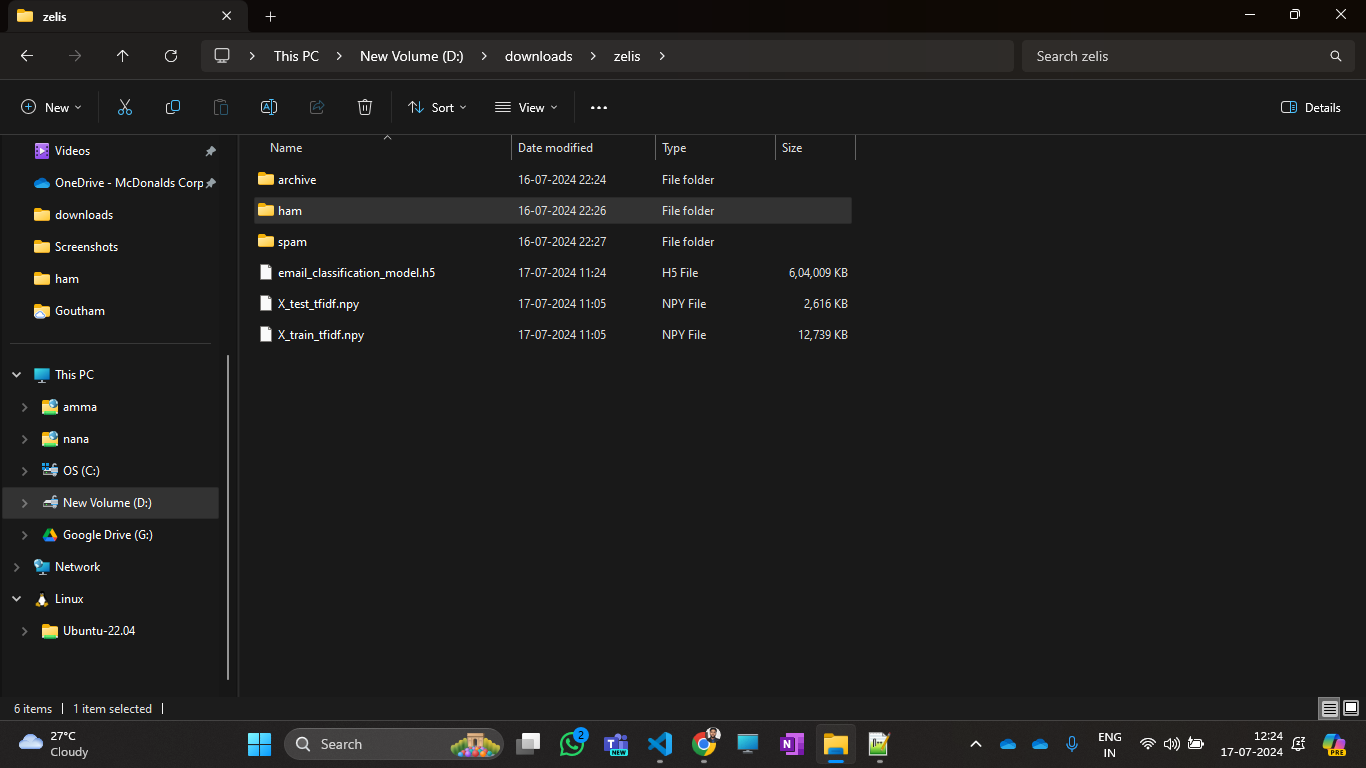

In [2]:
base_path = "/mnt/d/downloads/zelis/" #path for the folder

# Initialize lists to hold the data
emails = []
labels = []

# Read the spam emails
spam_path = os.path.join(base_path, "spam")
for filename in os.listdir(spam_path):
    file_path = os.path.join(spam_path, filename)
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        emails.append(file.read())
        labels.append("spam")

# Read the ham emails
ham_path = os.path.join(base_path, "ham")
for filename in os.listdir(ham_path):
    file_path = os.path.join(ham_path, filename)
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        emails.append(file.read())
        labels.append("ham")

# Create a DataFrame
emails_df = pd.DataFrame({"text": emails, "label": labels})

email_df data frame created

In [3]:
emails_df

,text,label
0,From ilug-admin@linux.ie Tue Aug 6 11:51:02 ...,spam
1,From 12a1mailbot1@web.de Thu Aug 22 13:17:22 ...,spam
2,From lmrn@mailexcite.com Mon Jun 24 17:03:24 ...,spam
3,From ilug-admin@linux.ie Thu Aug 22 13:27:39 ...,spam
4,From sabrina@mx3.1premio.com Thu Aug 22 14:44...,spam
...,...,...
6042,From sentto-2242572-60409-1039002175-jm=jmason...,ham
6043,From ilug-admin@linux.ie Wed Dec 4 11:53:04 ...,ham
6044,From ilug-admin@linux.ie Wed Dec 4 11:53:08 ...,ham
6045,From spambayes-bounces@python.org Wed Dec 4 ...,ham


In [34]:
emails_df.to_csv("/mnt/d/downloads/zelis/email_df.csv")

In [4]:
emails_df["label"].value_counts()

ham     4150
spam    1897
Name: label, dtype: int64

pre-processing text using nltk library removing stopwords and splitting the data as train and test 

In [5]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


# Apply preprocessing
emails_df["text"] = emails_df["text"].apply(preprocess_text)

# Split the dataset into features and labels
X = emails_df["text"]
y = emails_df["label"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


i have tried using word embedings/vectore embedings from tensforlow hub i.e., universal-sentence-encoder which is a 512 dimesnional vector but its heavy for my laptop config hence going for light weight tf-idf vectorizers 

In [6]:
# !pip3 install tensorflow_hub

In [7]:
# # Load pre-trained Universal Sentence Encoder model
# embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


# # Function to get USE embeddings
# def get_use_embeddings(text_list):
#     embeddings = embed(text_list)
#     return embeddings.numpy()


# # Get USE embeddings for train and test sets
# X_train_use = get_use_embeddings(X_train.tolist())
# X_test_use = get_use_embeddings(X_test.tolist())


# Load USE embeddings

# np.save("/mnt/d/downloads/zelis/X_train_tfidf.npy", X_train_tfidf)
# np.save("/mnt/d/downloads/zelis/X_test_tfidf.npy", X_test_tfidf)

using tf-idf vectorizer

In [15]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

checking data type of X_train_tfidf and X_test_tfidf

In [16]:
type(X_train_tfidf)

scipy.sparse._csr.csr_matrix

In [17]:
type(X_test_tfidf)

scipy.sparse._csr.csr_matrix

saving features in local for x_train and x_test

In [18]:
np.save("/mnt/d/downloads/zelis/X_train_tfidf.npy", X_train_tfidf)
np.save("/mnt/d/downloads/zelis/X_test_tfidf.npy", X_test_tfidf)

load features back from local and convert back to csr_matrix as when we load back they are in numpy array

In [25]:
X_train_tfidf_loaded = np.load(
    "/mnt/d/downloads/zelis/X_train_tfidf.npy", allow_pickle=True
)
X_test_tfidf_loaded = np.load(
    "/mnt/d/downloads/zelis/X_test_tfidf.npy", allow_pickle=True
)

# Convert loaded objects back to scipy.sparse.csr_matrix
X_train_tfidf = csr_matrix(X_train_tfidf_loaded.item())
X_test_tfidf = csr_matrix(X_test_tfidf_loaded.item())

In [26]:
print(type(X_train_tfidf))
print(type(X_test_tfidf))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [25]:
# !pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tf_keras
Note: you may need to restart the kernel to use updated packages.


using deep learning for classification

In [28]:
model = Sequential(
    [
        Dense(256, activation="relu", input_shape=(X_train_tfidf.shape[1],)),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    X_train_tfidf,
    y_train.map({"ham": 0, "spam": 1}),
    epochs=10,
    batch_size=32,
    validation_split=0.2,
)

/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 623ms/step - accuracy: 0.7951 - loss: 0.4024 - val_accuracy: 0.9948 - val_loss: 0.0173
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 76s 630ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9938 - val_loss: 0.0165
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 74s 607ms/step - accuracy: 1.0000 - loss: 6.3686e-04 - val_accuracy: 0.9938 - val_loss: 0.0158
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 68s 562ms/step - accuracy: 1.0000 - loss: 2.2358e-04 - val_accuracy: 0.9938 - val_loss: 0.0159
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 63s 519ms/step - accuracy: 1.0000 - loss: 1.0619e-04 - val_accuracy: 0.9938 - val_loss: 0.0161
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 67s 551ms/step - accuracy: 1.0000 - loss: 8.2127e-05 - val_accuracy: 0.9938 - val_loss: 0.0162
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 71s 587ms/step - accuracy: 1.0000 - loss: 6.8703e-05 - val_accuracy: 0.9959 - val_loss: 0.0164
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 69s 567ms/step - accura

saving or exporting model to local we can load it directly next time on new data

In [29]:
# Save the entire model to a HDF5 file
model.save("/mnt/d/downloads/zelis/email_classification_model.h5")

In [30]:
# Load the saved model
loaded_model = load_model("/mnt/d/downloads/zelis/email_classification_model.h5")

making prediction on test data and getting metrics

In [31]:
# Make predictions on the test set
y_pred_probs = loaded_model.predict(X_test_tfidf)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Convert numeric predictions back to labels
y_pred_labels = pd.Series(y_pred).map({0: "ham", 1: "spam"})

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label="spam")
recall = recall_score(y_test, y_pred_labels, pos_label="spam")
f1 = f1_score(y_test, y_pred_labels, pos_label="spam")

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step
Accuracy: 0.9950413223140496
Precision: 0.9951573849878934
Recall: 0.9903614457831326
F1-score: 0.9927536231884058


getting confusion matrix

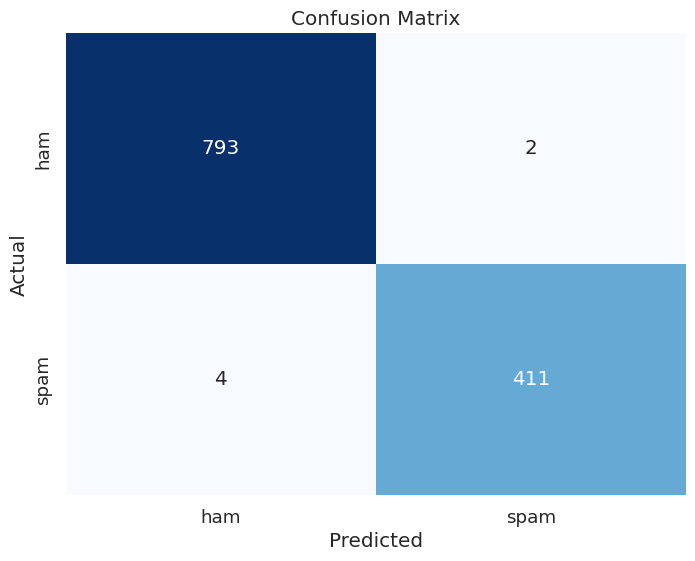

In [33]:
y_true = y_test  # Actual labels from test set
y_pred = y_pred_labels  # Predicted labels from your model

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=["ham", "spam"])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["ham", "spam"],
    yticklabels=["ham", "spam"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()